# 1 Importação das Bibliotecas Necessárias

In [644]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, KBinsDiscretizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm





# 2 Carregar o dataset

In [645]:
# Definindo o caminho do arquivo CSV.
file_path = '/content/Base_ScoreCredito_QuantumFinance.csv'

# Carregando os dados do CSV com o delimitador.
df = pd.read_csv(file_path, delimiter=';', decimal=',')

# Exibindo as primeiras linhas do DataFrame.
df.head()

,id,idade,sexo,estado_civil,escola,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO
0,708082083,45,F,casado,graduacao,3,40,1,40.089665,3,0,0,1,1,778.0
1,708083283,58,M,solteiro,ensino fundam,0,44,1,66.557645,3,0,0,1,0,276.3
2,708084558,46,M,divorciado,doutorado,3,35,1,123.681821,6,0,0,1,1,401.0
3,708085458,34,F,solteiro,mestrado,0,22,1,19.715934,6,0,0,1,0,347.4
4,708086958,49,F,casado,mestrado,2,36,0,0.000000,3,1,437,1,2,476.0


 ## 2.1 Informações do dataset

In [646]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10127 non-null  int64  
 1   idade                10127 non-null  int64  
 2   sexo                 10127 non-null  object 
 3   estado_civil         10127 non-null  object 
 4   escola               10127 non-null  object 
 5   Qte_dependentes      10127 non-null  int64  
 6   tempo_ultimoservico  10127 non-null  int64  
 7   trabalha             10127 non-null  int64  
 8   vl_salario_mil       10127 non-null  float64
 9   reg_moradia          10127 non-null  int64  
 10  casa_propria         10127 non-null  int64  
 11  vl_imovel_em_mil     10127 non-null  int64  
 12  Qte_cartoes          10127 non-null  int64  
 13  Qte_carros           10127 non-null  int64  
 14  SCORE_CREDITO        10127 non-null  float64
dtypes: float64(2), int64(10), object(3)


# 3 Limpeza e Tratamento inicial dos dados

### 3.1 Retirando a coluna de identificação ID

In [647]:
df_sem_id = df.drop(columns='id')

### 3.2 Verificando dados nulos

In [648]:
df_sem_id.isna().sum()

,0
idade,0
sexo,0
estado_civil,0
escola,0
Qte_dependentes,0
tempo_ultimoservico,0
trabalha,0
vl_salario_mil,0
reg_moradia,0
casa_propria,0


In [649]:
# identificamos que a feature estado_civil tem valores "na"
df_sem_id['estado_civil'].unique()

array(['casado', 'solteiro', 'divorciado', 'na'], dtype=object)

In [650]:
# Pegamos o valor mais frequente
modo = df_sem_id['estado_civil'].mode()[0]

# Substituimo "na" pelo valor mais frequente
df_sem_id['estado_civil'].replace('na', modo, inplace=True)

In [651]:
## verificando se os valores "na" foram alterados
df_sem_id['estado_civil'].unique()

array(['casado', 'solteiro', 'divorciado'], dtype=object)

### 3.3 Separando Features númericas e categóricas

In [652]:
df_numericos = df_sem_id.select_dtypes(include=['number']).columns
df_categorico = df_sem_id.select_dtypes(exclude=['number']).columns

### 3.4 Imputação dos valores faltantes com a média e frequência

In [653]:
# Criando imputers diferentes, para features númericas e categóricos
imputer_numerico = SimpleImputer(strategy='mean')
imputer_categorico = SimpleImputer(strategy='most_frequent')

# Aplicando os imputs
df_sem_id[df_numericos] = imputer_numerico.fit_transform(df_sem_id[df_numericos])
df_sem_id[df_categorico] = imputer_categorico.fit_transform(df_sem_id[df_categorico])

# Verificando se há valores nulos após a imputação
df_sem_id.isna().sum()


,0
idade,0
sexo,0
estado_civil,0
escola,0
Qte_dependentes,0
tempo_ultimoservico,0
trabalha,0
vl_salario_mil,0
reg_moradia,0
casa_propria,0


### 3.5 Verificando dados duplicados

In [654]:
duplicados = df_sem_id.duplicated()
num_duplicates = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicates}")

Número de registros duplicados: 0


# 4.0 Análise Exploratória de Dados (EDA) - Básica


### 4.1 Sumarização Estatística


In [655]:
df_sem_id.describe()

,idade,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,1.547447,34.133208,0.911919,70.209002,3.783450,0.352424,208.999111,1.083638,0.623383,469.500364
std,8.016814,1.489079,8.221428,0.283427,55.567032,1.580486,0.477749,378.495229,0.333784,0.569796,133.814653
min,26.000000,0.000000,7.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,162.000000
25%,41.000000,0.000000,30.000000,1.000000,21.330536,3.000000,0.000000,0.000000,1.000000,0.000000,375.000000
50%,46.000000,1.000000,34.000000,1.000000,66.486331,4.000000,0.000000,0.000000,1.000000,1.000000,449.600000
75%,52.000000,3.000000,39.000000,1.000000,107.544225,5.000000,1.000000,289.000000,1.000000,1.000000,540.900000
max,73.000000,5.000000,57.000000,1.000000,233.301793,6.000000,1.000000,1800.000000,4.000000,2.000000,979.650000


In [656]:
## Contando os valores
df_sem_id.count()

,0
idade,10127
sexo,10127
estado_civil,10127
escola,10127
Qte_dependentes,10127
tempo_ultimoservico,10127
trabalha,10127
vl_salario_mil,10127
reg_moradia,10127
casa_propria,10127


# 5.0 Identificação e Tratamento de Outliers

### 5.1 Separando as variáveis numéricas

In [657]:
df_numericos = df_sem_id[['vl_salario_mil', 'vl_imovel_em_mil', 'SCORE_CREDITO', 'idade']]

### 5.2 Identificação de Outliers com Boxplot

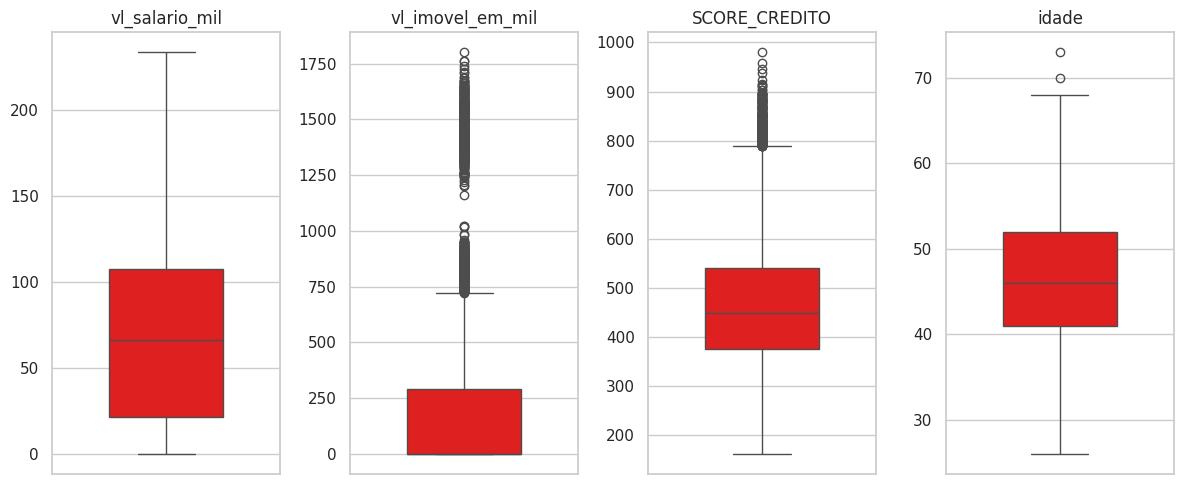

In [658]:
sns.set(style="whitegrid")

# Calculando o númereo de colunas no df.
num_cols = len(df_numericos.columns)

# Calculando o número de linhas necessárias para exibir todos os boxplots
num_rows = (num_cols + 3) // 4  # Arredondando para cima

# Configurando os boxplots
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(12, 5 * num_rows))
axes = axes.flatten()

# Iterando e criandos os boxplots
for i, col in enumerate(df_numericos.columns):
    sns.boxplot(y=df_sem_id[col], ax=axes[i], width=0.5, color='red')
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Removendo os espaços vazios
for i in range(num_cols, len(axes)):
    axes[i].axis('off')

# Ajustando o layout
plt.tight_layout()
plt.show()

### 5.3 Remoção de Outliers

Decidimos remover somente os Outliers da feature vl_imovel_em_mil

In [659]:
# Definindo o limite superior como o percentil 98
upper_limit = df_sem_id['vl_imovel_em_mil'].quantile(0.98)
df_sem_outlier = df_sem_id[df_sem_id['vl_imovel_em_mil'] < upper_limit]

In [660]:
df_sem_id['estado_civil'].unique()

array(['casado', 'solteiro', 'divorciado'], dtype=object)

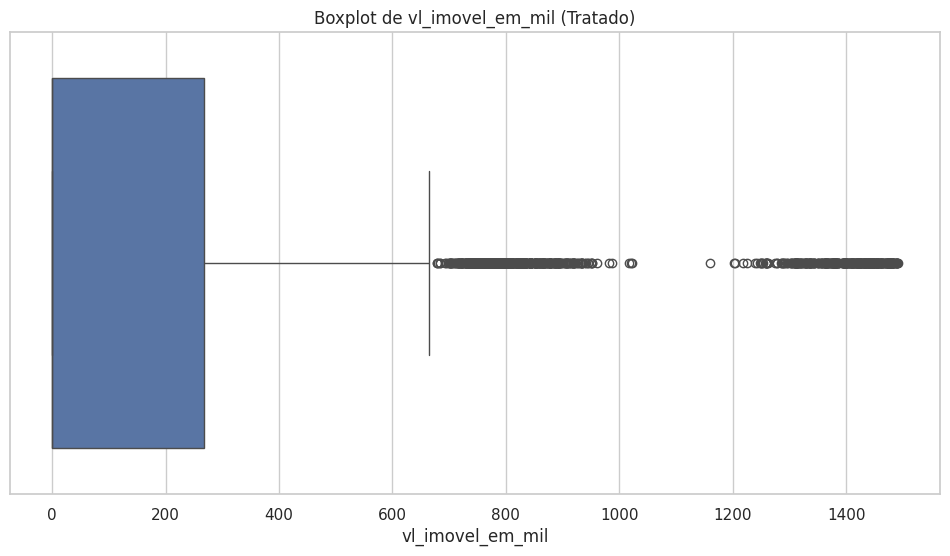

In [661]:
# Verificando o Boxplot após remoção dos Outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_sem_outlier, x='vl_imovel_em_mil')
plt.title('Boxplot de vl_imovel_em_mil (Tratado)')
plt.show()

# 6.0 Análise Exploratória de Dados

### 6.1 Distribuição das Variáveis

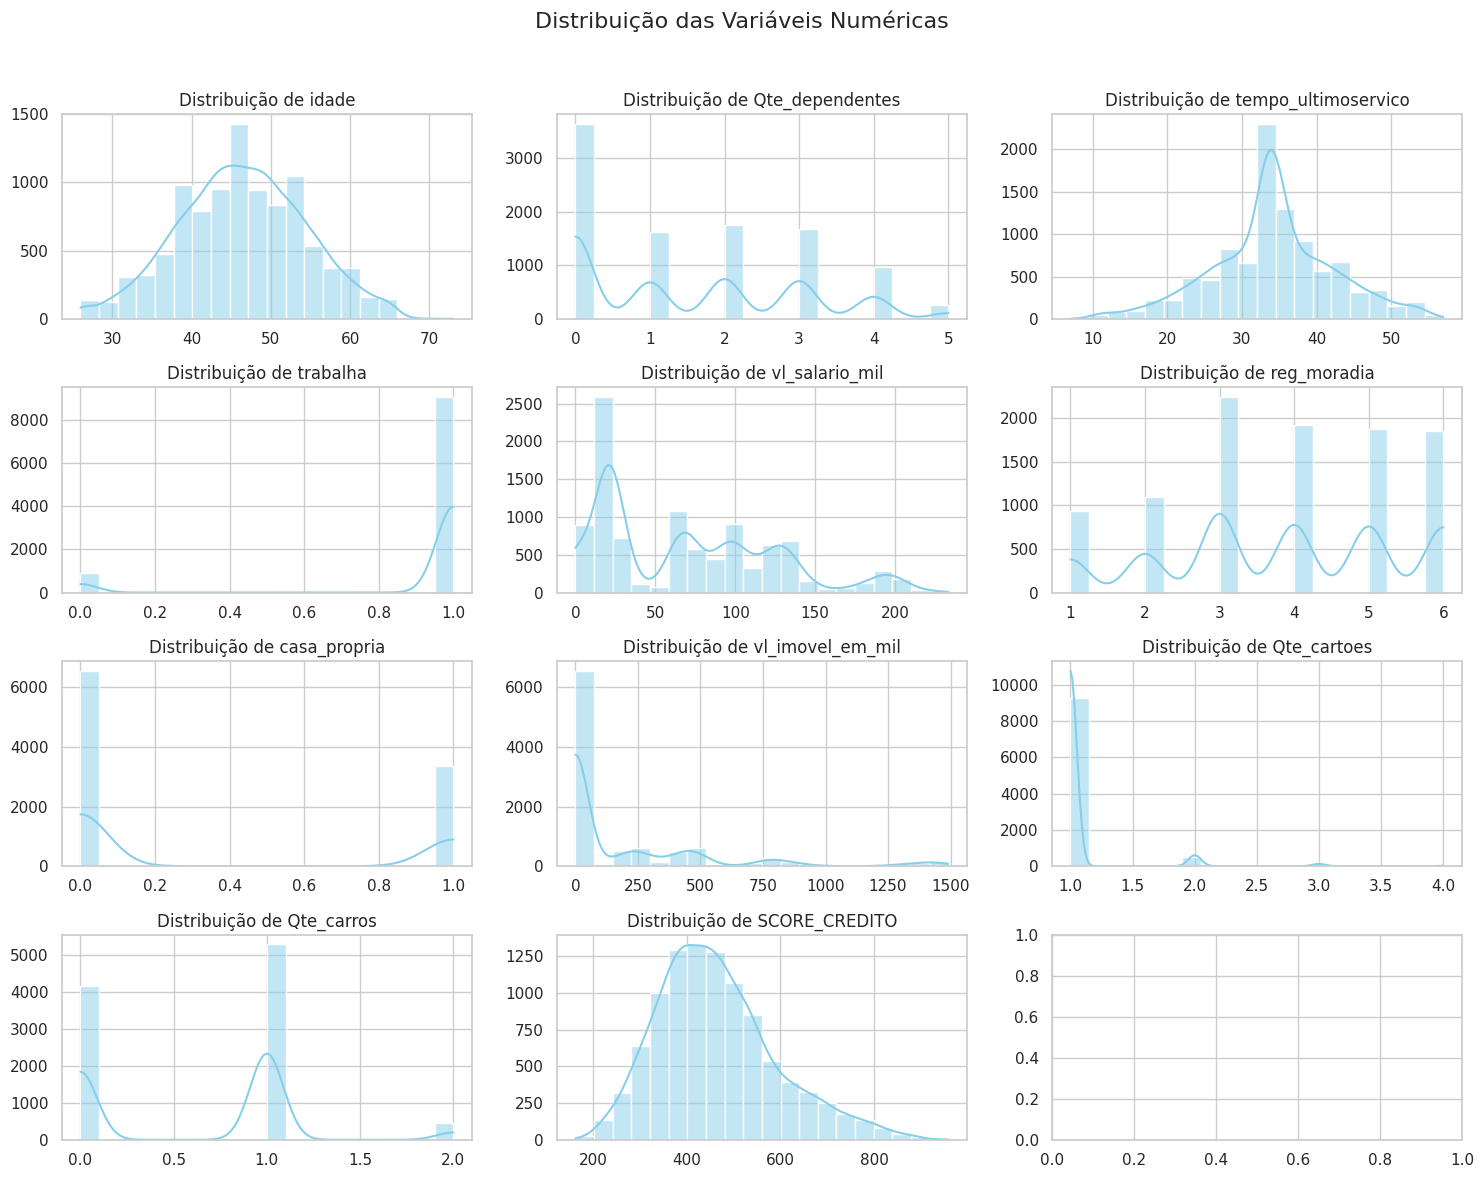

In [662]:
fig, axs = plt.subplots(4, 3, figsize=(15, 12))
fig.suptitle('Distribuição das Variáveis Numéricas', fontsize=16)

df_numericos = df_sem_outlier.select_dtypes(include=['number']).columns
for i, column in enumerate(df_numericos):
    ax = axs[i // 3, i % 3]
    sns.histplot(df_sem_outlier[column], bins=20, kde=True, ax=ax, color='skyblue')
    ax.set_title(f'Distribuição de {column}')
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# 7.0 Análise de Fairness

### 7.1 Gráfico de distribuição de Score por Sexo

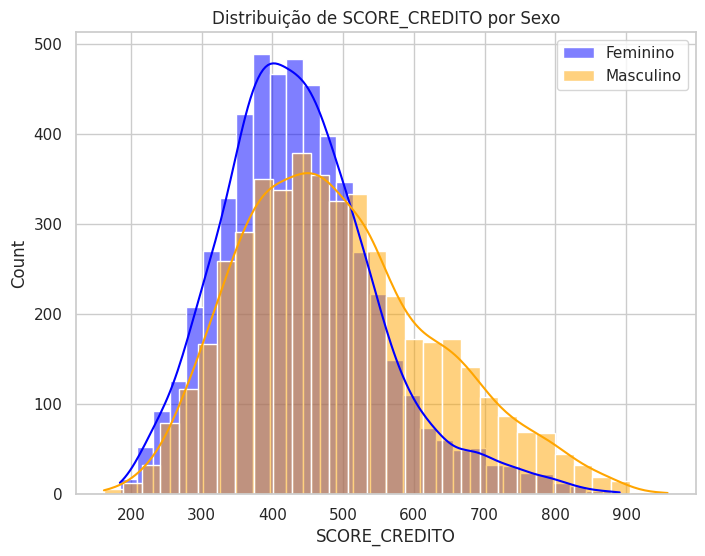

In [663]:
plt.figure(figsize=(8, 6))
sns.histplot(df_sem_outlier[df_sem_outlier['sexo'] == 'F']['SCORE_CREDITO'], color='blue', label='Feminino', kde=True, bins=30)
sns.histplot(df_sem_outlier[df_sem_outlier['sexo'] == 'M']['SCORE_CREDITO'], color='orange', label='Masculino', kde=True, bins=30)
plt.title('Distribuição de SCORE_CREDITO por Sexo')
plt.legend()
plt.show()

### 7.2 Gráfico de distribuição do Score Médio por Sexo

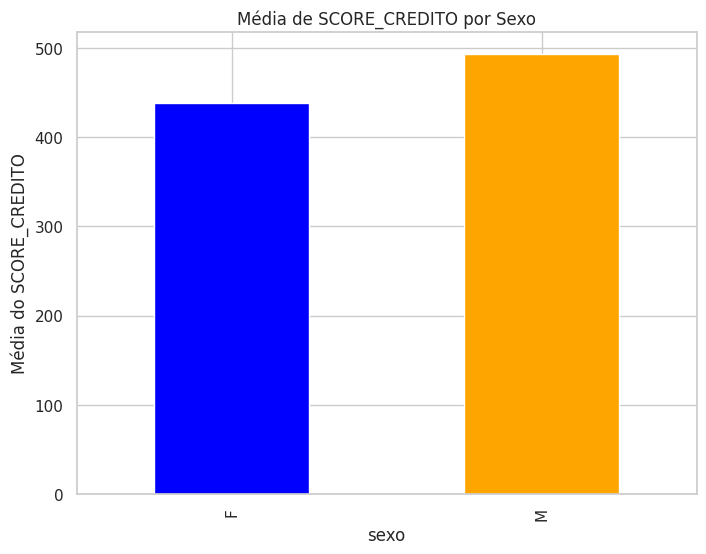

In [664]:
plt.figure(figsize=(8, 6))
df_sem_outlier.groupby('sexo')['SCORE_CREDITO'].mean().plot(kind='bar', color=['blue', 'orange'])
plt.title('Média de SCORE_CREDITO por Sexo')
plt.ylabel('Média do SCORE_CREDITO')
plt.show()

In [665]:
# Calcular a média de SCORE_CREDITO por sexo
media_score_feminino = df_sem_outlier[df_sem_outlier['sexo'] == 'F']['SCORE_CREDITO'].mean()
media_score_masculino = df_sem_outlier[df_sem_outlier['sexo'] == 'M']['SCORE_CREDITO'].mean()

# Determinar o grupo favorecido e o desfavorecido
grupo_favorecido = max(media_score_feminino, media_score_masculino)
grupo_desfavorecido = min(media_score_feminino, media_score_masculino)

# Calcular o DIR
dir = grupo_desfavorecido / grupo_favorecido

# Exibir resultado
print(f'Média do SCORE_CREDITO Feminino: {media_score_feminino:.2f}')
print(f'Média do SCORE_CREDITO Masculino: {media_score_masculino:.2f}')
print(f'Disparate Impact Ratio (DIR): {dir:.2f}')

Média do SCORE_CREDITO Feminino: 437.84
Média do SCORE_CREDITO Masculino: 492.94
Disparate Impact Ratio (DIR): 0.89


### Identificamos um viés em relação ao genêro e o score de crédito. Homens tendem a receber uma pontuação um pouco maior comparado as mulheres.
### Nesse exemplo, o DIR é 0.88, o que sugere que as mulheres estão recebendo aprovação de crédito a uma taxa significativamente menor que os homens, possivelmente indicando um viés de gênero

### 7.3 Gráfico de linha de Score por Idade

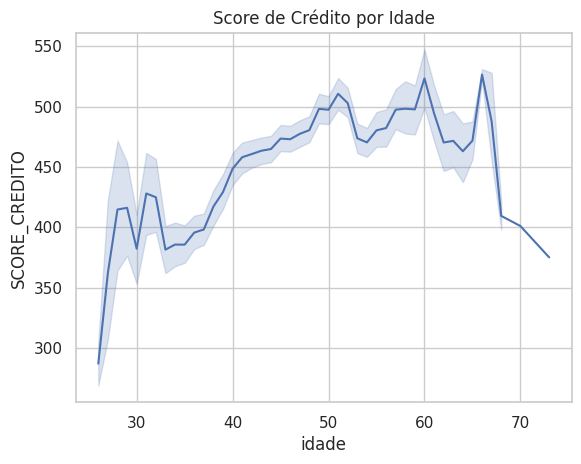

In [666]:
sns.lineplot(data=df_sem_outlier, x='idade', y='SCORE_CREDITO')
plt.title('Score de Crédito por Idade')
plt.show()

7.4 Disparate Impact Ratio (DIR) para salario em relação a SCORE

In [667]:
# Definindo a mediana da renda como ponto de corte entre 'Alta' e 'Baixa'
vl_salario_mil_median = df_sem_outlier['vl_salario_mil'].median()

# Separando os grupos de renda alta e baixa
high_vl_salario_mil_approved = df_sem_outlier[(df_sem_outlier['vl_salario_mil'] >= vl_salario_mil_median) & (df_sem_outlier['SCORE_CREDITO'] > 600 )].shape[0]
high_vl_salario_mil_total = df_sem_outlier[df_sem_outlier['vl_salario_mil'] >= vl_salario_mil_median].shape[0]
high_vl_salario_mil_rate = high_vl_salario_mil_approved / high_vl_salario_mil_total

low_vl_salario_mil_approved = df_sem_outlier[(df_sem_outlier['vl_salario_mil'] < vl_salario_mil_median) & (df_sem_outlier['SCORE_CREDITO'] >  600 )].shape[0]
low_vl_salario_mil_total = df_sem_outlier[df_sem_outlier['vl_salario_mil'] < vl_salario_mil_median].shape[0]
low_vl_salario_mil_rate = low_vl_salario_mil_approved / low_vl_salario_mil_total

# Calculando o DIR para renda
DIR_vl_salario_mil = low_vl_salario_mil_rate / high_vl_salario_mil_rate
print(f'Disparate Impact Ratio (DIR) para Renda: {DIR_vl_salario_mil:.2f}')

Disparate Impact Ratio (DIR) para Renda: 0.25


Identificamos usando DIR que a renda tem influência direta e muito forte em relação ao Score atribuido.

# 8.0 Técnicas de Encoding para Variáveis Categóricas

### 8.1 One-Hot Encoding

In [668]:
# Identificando colunas categóricas, contando valores únicos e listando esses valores
categorical_columns = [col for col in df_sem_outlier.columns if df_sem_outlier[col].dtype == 'object' or isinstance(df_sem_outlier[col].dtype, pd.CategoricalDtype)]
unique_counts = [df_sem_outlier[col].nunique() for col in categorical_columns]
unique_values = [df_sem_outlier[col].unique().tolist() for col in categorical_columns]

# Criando um DataFrame para exibir as informações categóricas detalhadas
categorical_info_df_sem_outlier = pd.DataFrame({
    'Coluna': categorical_columns,
    'Valores Únicos': unique_counts,
    'Valores Únicos Listados': unique_values
})

# Exibindo o DataFrame
print(categorical_info_df_sem_outlier)

         Coluna  Valores Únicos  \
0          sexo               2   
1  estado_civil               3   
2        escola               5   

                             Valores Únicos Listados  
0                                             [F, M]  
1                     [casado, solteiro, divorciado]  
2  [graduacao, ensino fundam, doutorado, mestrado...  


In [669]:
# Aplicar One-Hot Encoding
df_one_hot = pd.get_dummies(df_sem_outlier, columns=['sexo', 'estado_civil', 'escola'], dtype=int, drop_first=False)
df_one_hot

,idade,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,...,sexo_F,sexo_M,estado_civil_casado,estado_civil_divorciado,estado_civil_solteiro,escola_doutorado,escola_ensino fundam,escola_ensino medio,escola_graduacao,escola_mestrado
0,45.0,3.0,40.0,1.0,40.089665,3.0,0.0,0.0,1.0,1.0,...,1,0,1,0,0,0,0,0,1,0
1,58.0,0.0,44.0,1.0,66.557645,3.0,0.0,0.0,1.0,0.0,...,0,1,0,0,1,0,1,0,0,0
2,46.0,3.0,35.0,1.0,123.681821,6.0,0.0,0.0,1.0,1.0,...,0,1,0,1,0,1,0,0,0,0
3,34.0,0.0,22.0,1.0,19.715934,6.0,0.0,0.0,1.0,0.0,...,1,0,0,0,1,0,0,0,0,1
4,49.0,2.0,36.0,0.0,0.000000,3.0,1.0,437.0,1.0,2.0,...,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50.0,0.0,45.0,1.0,100.128971,4.0,0.0,0.0,1.0,0.0,...,0,1,1,0,0,0,0,0,0,1
10123,38.0,0.0,31.0,1.0,89.805996,6.0,0.0,0.0,1.0,1.0,...,0,1,0,0,1,0,1,0,0,0
10124,49.0,3.0,43.0,1.0,19.799306,3.0,1.0,252.0,1.0,1.0,...,1,0,1,0,0,0,0,0,1,0
10125,54.0,4.0,48.0,1.0,194.783176,4.0,0.0,0.0,1.0,1.0,...,0,1,1,0,0,0,0,1,0,0


In [670]:
print(df_one_hot.columns)

Index(['idade', 'Qte_dependentes', 'tempo_ultimoservico', 'trabalha',
       'vl_salario_mil', 'reg_moradia', 'casa_propria', 'vl_imovel_em_mil',
       'Qte_cartoes', 'Qte_carros', 'SCORE_CREDITO', 'sexo_F', 'sexo_M',
       'estado_civil_casado', 'estado_civil_divorciado',
       'estado_civil_solteiro', 'escola_doutorado', 'escola_ensino fundam',
       'escola_ensino medio', 'escola_graduacao', 'escola_mestrado'],
      dtype='object')


# 10.0 Criação de Features Derivadas

### 10.1 Feature Crossing

In [671]:
# Copiar dataset
df_feature = df_one_hot

# Criar feature derivada: idade x Salário
df_feature['Idade_Salario_Cross'] = df_feature['idade'] * df_feature['vl_salario_mil']

# Mostrar as primeiras linhas do DataFrame com feature crossing
df_feature[['idade', 'vl_salario_mil', 'Idade_Salario_Cross']].head()

,idade,vl_salario_mil,Idade_Salario_Cross
0,45.0,40.089665,1804.034926
1,58.0,66.557645,3860.343426
2,46.0,123.681821,5689.363761
3,34.0,19.715934,670.341767
4,49.0,0.000000,0.000000


In [672]:
df_feature.head()

,idade,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,...,sexo_M,estado_civil_casado,estado_civil_divorciado,estado_civil_solteiro,escola_doutorado,escola_ensino fundam,escola_ensino medio,escola_graduacao,escola_mestrado,Idade_Salario_Cross
0,45.0,3.0,40.0,1.0,40.089665,3.0,0.0,0.0,1.0,1.0,...,0,1,0,0,0,0,0,1,0,1804.034926
1,58.0,0.0,44.0,1.0,66.557645,3.0,0.0,0.0,1.0,0.0,...,1,0,0,1,0,1,0,0,0,3860.343426
2,46.0,3.0,35.0,1.0,123.681821,6.0,0.0,0.0,1.0,1.0,...,1,0,1,0,1,0,0,0,0,5689.363761
3,34.0,0.0,22.0,1.0,19.715934,6.0,0.0,0.0,1.0,0.0,...,0,0,0,1,0,0,0,0,1,670.341767
4,49.0,2.0,36.0,0.0,0.000000,3.0,1.0,437.0,1.0,2.0,...,0,1,0,0,0,0,0,0,1,0.000000


## 11.0 Análise de correlaçao

In [673]:
# Separando novamente as featurings númericas de categóricas

df_feature_numericos = df_feature[['idade', 'Qte_dependentes', 'tempo_ultimoservico', 'vl_salario_mil', 'vl_imovel_em_mil', 'SCORE_CREDITO', 'Idade_Salario_Cross']]
df_feature_categoricos = df_feature[['trabalha', 'reg_moradia', 'casa_propria', 'Qte_cartoes', 'Qte_carros', 'sexo_F', 'sexo_M',
       'estado_civil_casado', 'estado_civil_divorciado',
       'estado_civil_solteiro', 'escola_doutorado', 'escola_ensino fundam',
       'escola_ensino medio', 'escola_graduacao', 'escola_mestrado']]

In [674]:
# Analisando a correlação entre as variáveis numéricas

corr = df_feature_numericos.corr(method='pearson')
corr

,idade,Qte_dependentes,tempo_ultimoservico,vl_salario_mil,vl_imovel_em_mil,SCORE_CREDITO,Idade_Salario_Cross
idade,1.000000,-0.074497,0.772104,0.093305,-0.014307,0.233223,0.264571
Qte_dependentes,-0.074497,1.000000,-0.052419,0.042113,0.098842,0.103340,0.019449
tempo_ultimoservico,0.772104,-0.052419,1.000000,0.130682,0.073734,0.388511,0.263750
vl_salario_mil,0.093305,0.042113,0.130682,1.000000,0.111553,0.411132,0.973237
vl_imovel_em_mil,-0.014307,0.098842,0.073734,0.111553,1.000000,0.466335,0.100983
SCORE_CREDITO,0.233223,0.103340,0.388511,0.411132,0.466335,1.000000,0.429404
Idade_Salario_Cross,0.264571,0.019449,0.263750,0.973237,0.100983,0.429404,1.000000


Text(0.5, 1.0, 'Análise de Correlação')

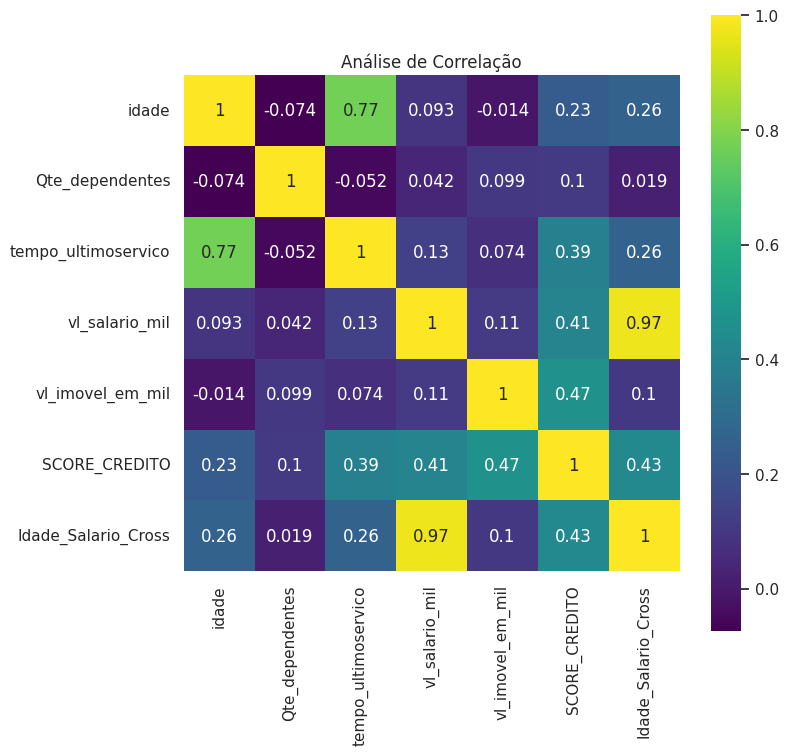

In [675]:
## Grafico de correlação de Pearson das features númericas.

correlation = df_feature_numericos.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Análise de Correlação')

# 12.0 Separação das Variáveis Independentes e Dependente

In [676]:
X = df_feature.drop('SCORE_CREDITO', axis=1)
y = df_feature['SCORE_CREDITO']

# 13.0 Análise de Regressão Linear pelo stats models

In [677]:
# Adicionando a constante para o modelo
X = sm.add_constant(X)

# Ajustando o modelo de regressão linear
modelo = sm.OLS(y, X).fit()

# Imprimindo o resumo estatístico do modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:          SCORE_CREDITO   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     915.2
Date:                Sat, 28 Sep 2024   Prob (F-statistic):               0.00
Time:                        18:52:17   Log-Likelihood:                -57381.
No. Observations:                9924   AIC:                         1.148e+05
Df Residuals:                    9905   BIC:                         1.149e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

#14.0 Criando o modelo de Regressão Linear

In [678]:
X_treated = df_feature.drop('SCORE_CREDITO', axis=1)
y_treated = df_feature[['SCORE_CREDITO', 'escola_ensino fundam']].loc[X_treated.index]

In [679]:
X_train_treated, X_test_treated, y_train_treated, y_test_treated = train_test_split(X_treated, y_treated, test_size=0.2, random_state=42)

In [680]:
model_treated = LinearRegression()
model_treated.fit(X_train_treated, y_train_treated)
predictions_treated = model_treated.predict(X_test_treated)

# 15.0 Métricas de desempenho

In [681]:
# Predição no conjunto de teste
y_pred = model_treated.predict(X_test_treated)

# Cálculo dos resíduos
residuos = y_test_treated - y_pred

# Cálculo das medidas de erro
rmse = np.sqrt(mean_squared_error(y_test_treated, y_pred))
mae = mean_absolute_error(y_test_treated, y_pred)
r2 = r2_score(y_test_treated, y_pred)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R^2: {r2}')

RMSE: 56.41226168024945
MAE: 30.530382074960883
R^2: 0.8068405470854915


In [682]:
mse_treated = mean_squared_error(y_test_treated, y_pred)
print(f"MSE com dados tratados: {mse_treated}")


MSE com dados tratados: 3182.343267880941


# 16.0 Visualização dos Resultados Dados Tratados e Brutos


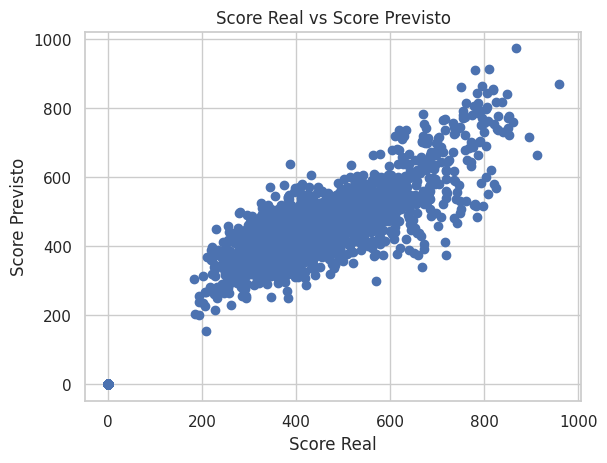

In [683]:

plt.scatter(y_test_treated, y_pred)
plt.xlabel('Score Real')
plt.ylabel('Score Previsto')
plt.title('Score Real vs Score Previsto')
plt.show()

# 17.0 Conclusões

Utilizando algumas das técnicas de Feature Engineering aprendidas em aula, conseguimos alcançar boas métricas de predição do Score de crédito, tratando os dados, realizando análises e identificando os vieses. Não aplicamos todas as técnicas, somente aquelas necessárias para se obter os melhores resultados para o dataset especifico.